## Movies working


In [2]:
import pandas as pd
import numpy as np

movies_data = pd.read_csv('IMDB-Movie-Data.csv')
movies_rank_500 = movies_data.iloc[0:500,:]

movies_rank_1000 = movies_data.iloc[500:1000,:]
#making it into back to one table
movies_rank_1000 = movies_rank_1000.reset_index()
del(movies_rank_1000['index'])
movies_full = pd.concat([movies_rank_500,movies_rank_1000],ignore_index=True)
movies_full.index = movies_full.index + 1

#handling data types
print(movies_full.dtypes)
#so data type is correct

#Handling missing values
print(movies_full.isna().sum())



#so revenue and metascore has missing values
mean_revenue = movies_full['Revenue (Millions)'].mean()
mean_metascore = movies_full['Metascore'].mean()

#select the row of both which has missing values
movies_full['Revenue (Millions)'] = movies_full['Revenue (Millions)'].fillna(mean_revenue)
movies_full['Metascore'] = movies_full['Metascore'].fillna(mean_metascore)
print(movies_full.isna().sum()) #check

#checking duplicates
print(movies_full.duplicated().sum())
#here title is same but it cannot be same so we have to remove it
print(movies_full['Title'].duplicated().sum()) #yes 1

index_duplicate_contain = movies_full[movies_full['Title'].duplicated()].index[0]
rank = movies_full.iloc[633,0]
print(index_duplicate_contain)

#removing duplicates
movies_full.drop(633,inplace=True)
print(movies_full['Title'].duplicated().sum())


#but from here our index is disturbed


movies_full1 = movies_full
movies_full2 = movies_full
movies_full1 = movies_full1[movies_full1['Rank'] < rank]
movies_full2['Rank'] = movies_full2[movies_full2['Rank'] > rank]['Rank'] - 1
movies_full2=movies_full2.dropna()
movies_full_merged = pd.concat([movies_full1,movies_full2],ignore_index=True)
movies_full_merged=movies_full_merged.reset_index()
del(movies_full_merged['index'])
movies_full_merged.index = movies_full_merged.index + 1
print(movies_full_merged['Title'].duplicated().sum())



movies_full_merged

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object
Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64
Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
1,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0
2,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460000,65.0
3,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120000,62.0
4,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320000,59.0
5,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020000,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,995.0,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,82.956376,45.0
995,996.0,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.540000,46.0
996,997.0,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.010000,50.0
997,998.0,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,82.956376,22.0


Index(['Rank', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue',
       'Metascore', 'Decade'],
      dtype='object')
    Rating    Duration
0      1.9   87.000000
1      2.7   79.000000
2      3.2  133.000000
3      3.5   93.500000
4      3.7  107.500000
5      3.9   93.000000
6      4.0  101.000000
7      4.1  125.000000
8      4.2  102.500000
9      4.3  107.000000
10     4.4   92.000000
11     4.5   95.000000
12     4.6   86.600000
13     4.7  100.833333
14     4.8  100.750000
15     4.9  103.666667
16     5.0   96.750000
17     5.1   99.400000
18     5.2  106.909091
19     5.3  105.916667
20     5.4  102.250000
21     5.5  105.428571
22     5.6   99.588235
23     5.7  109.142857
24     5.8  105.923077
25     5.9  109.052632
26     6.0  107.615385
27     6.1  106.580645
28     6.2  109.000000
29     6.3  107.886364
30     6.4  103.942857
31     6.5  110.225000
32     6.6  110.000000
33     6.7  114.083333
34     6.8  107.837838
35     6.9  110.225806
36     7.0  116.400000

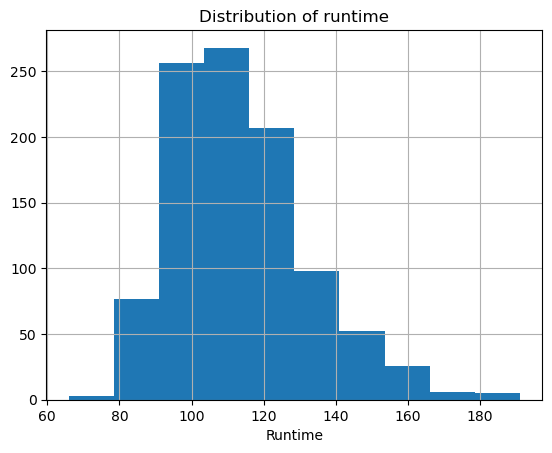

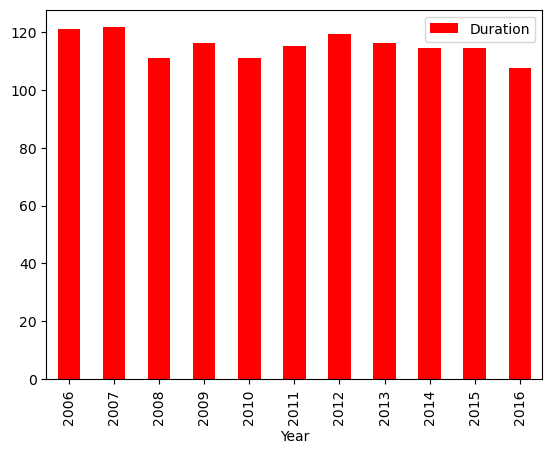

<Figure size 2000x600 with 0 Axes>

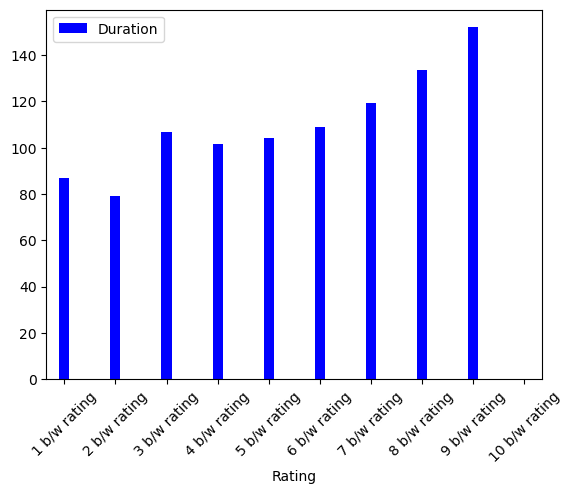

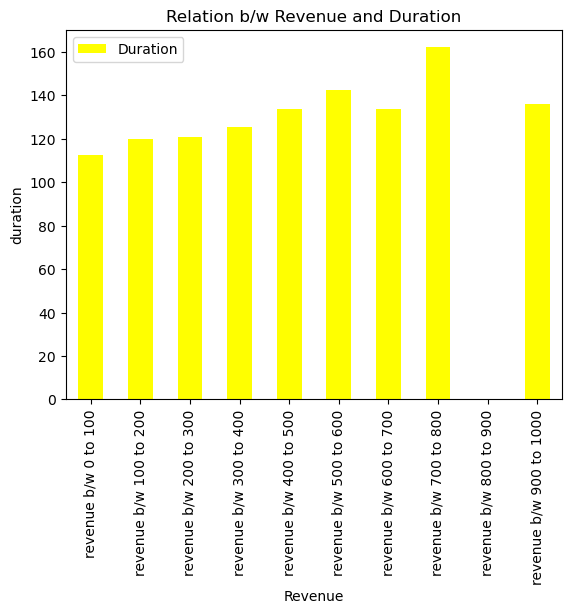

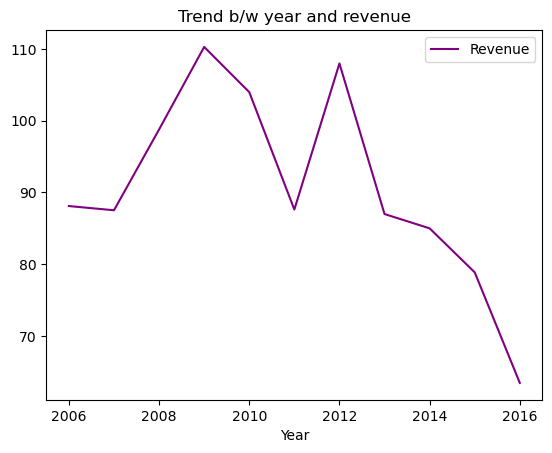

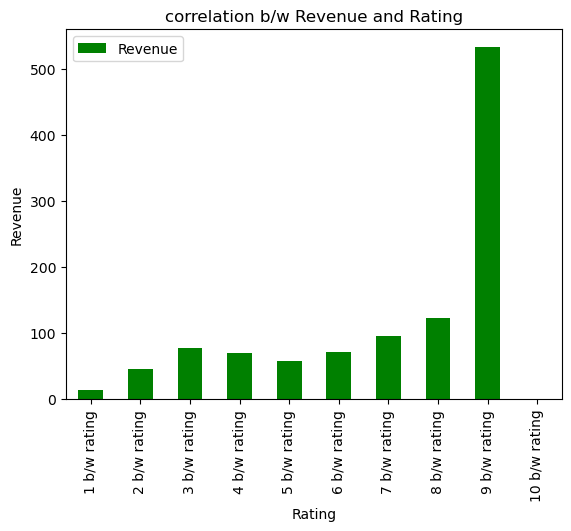

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue,Metascore,Decade
1,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0,2010
2,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460000,65.0,2010
3,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120000,62.0,2010
4,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320000,59.0,2010
5,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020000,40.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995.0,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,82.956376,45.0,2010
995,996.0,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.540000,46.0,2000
996,997.0,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.010000,50.0,2000
997,998.0,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,82.956376,22.0,2010


In [6]:
movies_content = movies_full_merged.select_dtypes(['int64','float'])
print(movies_content.columns)
import matplotlib.pyplot as plt
#doing some visualization
movies_content['Runtime (Minutes)'].hist(bins=10)
plt.xlabel('Runtime')
plt.title('Distribution of runtime')
movies_content.columns = movies_content.columns.str.replace('Runtime (Minutes)','Duration')
movies_group_year = movies_content.groupby('Year').agg({'Duration':'mean'})
movies_group_year.plot(kind='bar',color='red')

movies_group_rating = movies_content.groupby('Rating',as_index=False).agg({'Duration':'mean'})
print(movies_group_rating)
new_dataframe = {"Rating":[],"Duration":[]}
for i in range(1,11):
    sum=0
    count=0
    new_dataframe['Rating'].append(f'{i} b/w rating')
    for row,lab in movies_group_rating.iterrows():
        if int(lab['Rating']) == i:
            sum += lab['Duration']
            count += 1
    if sum != 0:
        sum = sum/count

    new_dataframe['Duration'].append(sum)

print(new_dataframe['Duration'])

new_pdataframe = pd.DataFrame(new_dataframe)
# print(new_pdataframe)


plt.figure(figsize=(20,6))
new_pdataframe.plot(x='Rating',y='Duration',kind='bar',color='blue',width=0.2)
plt.xticks(rotation=45,fontsize=10)
# print(movies_content.columns)

movies_content.columns = movies_content.columns.str.replace('Revenue (Millions)','Revenue')

movies_group_by_revenue = movies_content.groupby('Revenue',as_index=False).agg({'Duration':'mean'})
import math
uplimit = math.ceil(movies_group_by_revenue['Revenue'].max())
new_dataframe2 = {"Revenue":[],"Duration":[]}
if((uplimit % 100) != 0):
    value = 100 - uplimit % 100
    uplimit = uplimit + value

for i in range(100,uplimit+1,100):
    sum=0
    count=0
    previous = i - 100
    new_dataframe2['Revenue'].append(f'revenue b/w {previous} to {i}')
    for row,lab in movies_group_by_revenue.iterrows():
        if int(lab['Revenue']) <= i and lab['Revenue'] >= previous:
            sum += lab['Duration']
            count += 1
    if sum != 0:
        sum = sum/count

    new_dataframe2['Duration'].append(sum)

print(movies_group_by_revenue,uplimit)
newpdataframe2 = pd.DataFrame(new_dataframe2)
newpdataframe2.plot(x='Revenue',y='Duration',kind='bar',color='yellow')
plt.ylabel('duration')
plt.title('Relation b/w Revenue and Duration')

movies_group_by_year = movies_content.groupby('Year',as_index=False).agg({'Revenue':'mean'})
movies_group_by_year.plot(y='Revenue',x='Year',kind='line',color='purple')
plt.title('Trend b/w year and revenue')
# print(movies_group_by_year)
movies_group_by_rating = movies_content.groupby('Rating',as_index=False).agg({'Revenue':'mean'})
new_dataframe3 = {"Rating":[],"Revenue":[]}
for i in range(1,11):
    sum=0
    count=0
    new_dataframe3['Rating'].append(f'{i} b/w rating')
    for row,lab in movies_group_by_rating.iterrows():
        if int(lab['Rating']) == i:
            sum += lab['Revenue']
            count += 1
    if sum != 0:
        sum = int(sum)/count

    new_dataframe3['Revenue'].append(sum)
newrdataframe = pd.DataFrame(new_dataframe3)
print(newrdataframe)
newrdataframe.plot(x='Rating',y='Revenue',kind='bar',color='green')
plt.ylabel('Revenue')
plt.title('correlation b/w Revenue and Rating')

movies_full_merged.columns=movies_full_merged.columns.str.replace('Revenue (Millions)','Revenue')


movies_group_by_genre = movies_full_merged.groupby('Genre',as_index=False).agg({'Revenue':'mean'})
movies_group_by_genre2 = movies_full_merged.groupby('Genre',as_index=False).agg({'Rating':'mean'})
movies1_sort = movies_group_by_genre.sort_values(['Revenue'],ascending=False)
movies2_sort = movies_group_by_genre2.sort_values(['Rating'],ascending=False)
print(f"The genre which has highest Revenue is: {movies1_sort.iloc[0,0]}")
print(f"The genre which has highest Rating is: {movies2_sort.iloc[0,0]}")


movies_group_by_director = movies_full_merged.groupby('Director',as_index=False).agg({'Revenue':'mean'})
movies_group_by_actors = movies_full_merged.groupby('Actors',as_index=False).agg({'Revenue':'mean'})

movies_sort_1 = movies_group_by_director.sort_values(['Revenue'],ascending=False)
movies_sort_2 = movies_group_by_actors.sort_values(['Revenue'],ascending=False)
print(f"The highest success director: {movies_sort_1.iloc[0,0]}")
print(f"The highest success Actor: {movies_sort_2.iloc[0,0]}")

cast_index = movies_full_merged.loc[movies_full_merged['Actors']==movies_sort_2.iloc[0,0]].index
director_index = movies_full_merged.loc[movies_full_merged['Director']==movies_sort_1.iloc[0,0]].index
if(cast_index == director_index):
    print("yes they both are worked together")
else:
    print("no they both not worked together")

#checking for lower duplicates
movies_title = movies_full_merged['Title'].str.lower()

print(movies_title.duplicated().sum())

#creating decade column
movies_full_merged['Decade'] = (movies_full_merged['Year']//10)*10


plt.show()
movies_full_merged

# movies_content.head()

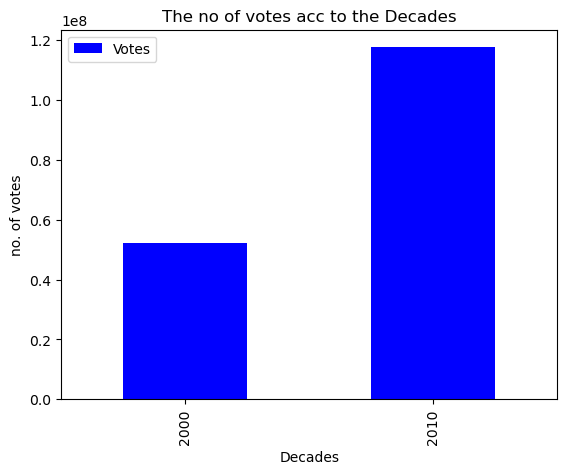

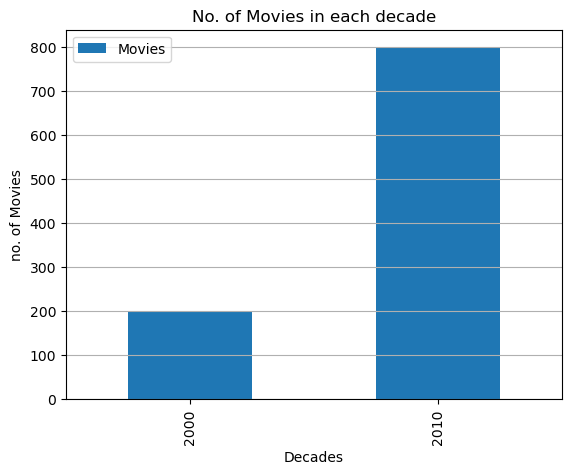

In [11]:
#grouping the no.votes on movies by decade

movies_group_by_decade = movies_full_merged.groupby('Decade',as_index=False).agg({'Votes':'sum'})

movies_group_by_decade.plot(kind='bar',x='Decade',y='Votes',color='blue')
plt.xlabel('Decades')
plt.ylabel('no. of votes')
plt.title('The no of votes acc to the Decades')
movies_full_merged.columns = movies_full_merged.columns.str.replace('Title',"Movies")
movies_group_by_decade2 = movies_full_merged.groupby('Decade',as_index=False).agg({'Movies':'count'})
movies_group_by_decade2.plot(kind='bar',x='Decade',y='Movies')
plt.grid(axis='y')
plt.xlabel('Decades')
plt.ylabel('no. of Movies')
plt.title('No. of Movies in each decade')
plt.show()
